# Hotel Booking Exploratory Data Analysis
### All personally identifiable information has been removed from the data.

This data is from Nuno Antonio, Ana Almeida, and Luis Nunes from their February 2019 article, “Hotel Booking Demand Datasets,” written for their Brief Volume 22 for his Data.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib 
import matplotlib.pyplot as plt


In [33]:
#make sure all coulmn are display while we use head function
pd.options.display.max_columns=None

#read data
df=pd.read_csv('hotel_bookings.csv')
df.head(50)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,NaN,NaN,0,Transient,107.00,0,0,Check-Out,2015-07-03
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,0.0,0,FB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,303.0,NaN,0,Transient,103.00,0,1,Check-Out,2015-07-03
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,82.00,0,1,Canceled,2015-05-06
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,0.0,0,HB,PRT,Offline TA/TO,TA/TO,0,0,0,D,D,0,No Deposit,15.0,NaN,0,Transient,105.50,0,0,Canceled,2015-04-22


### Observation:
- We need to check if hotel row only have one value. So, we will drop it 
- Check arrive_date_year & arrive_date_moth if the have unique values or not
- children & agent column convert from float into int
- reservation_status_date convert into datetime
- customer_type convert from object to category
- reservation_status  convert from object ctaegory

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

## Data Prepration / Cleansing Data 
- Handel missing Values
- Convert column values 
- Changing datatypes
- Handel duplication
- Convert new columns by combing other columns
- Drop unnecessary columns 

## Data Prepration 
#### Handel missing values 

In [35]:
for i in df.columns:
    if df[i].isna().sum()!= 0 :
        print('Null Values in ', i, "Column :", df[i].isna().sum())

Null Values in  children Column : 4
Null Values in  country Column : 488
Null Values in  agent Column : 16340
Null Values in  company Column : 112593


In [36]:
# let's know how many rows 
len(df.index)

119390

In [37]:
#1-observation: since the number of rows 119390.
# company column have 112593 which mean most of it is missing
#based on that better to drop that column
df = df.drop(columns ='company')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 31 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [38]:
#2- observation since children column only 4 rows null
# this 4 rows doesn't effect our result too much 
# we can just drop them 
df= df.dropna(subset =['children'])
# let's confirm df after drop 4 rows 
len(df.index)

119386

In [39]:
#3-Observation countery column we have 488 null values
# let's know first what's the data we have in this column
df.country.unique()

array(['PRT', 'GBR', 'USA', 'ESP', 'IRL', 'FRA', nan, 'ROU', 'NOR', 'OMN',
       'ARG', 'POL', 'DEU', 'BEL', 'CHE', 'CN', 'GRC', 'ITA', 'NLD',
       'DNK', 'RUS', 'SWE', 'AUS', 'EST', 'CZE', 'BRA', 'FIN', 'MOZ',
       'BWA', 'LUX', 'SVN', 'ALB', 'IND', 'CHN', 'MEX', 'MAR', 'UKR',
       'SMR', 'LVA', 'PRI', 'SRB', 'CHL', 'AUT', 'BLR', 'LTU', 'TUR',
       'ZAF', 'AGO', 'ISR', 'CYM', 'ZMB', 'CPV', 'ZWE', 'DZA', 'KOR',
       'CRI', 'HUN', 'ARE', 'TUN', 'JAM', 'HRV', 'HKG', 'IRN', 'GEO',
       'AND', 'GIB', 'URY', 'JEY', 'CAF', 'CYP', 'COL', 'GGY', 'KWT',
       'NGA', 'MDV', 'VEN', 'SVK', 'FJI', 'KAZ', 'PAK', 'IDN', 'LBN',
       'PHL', 'SEN', 'SYC', 'AZE', 'BHR', 'NZL', 'THA', 'DOM', 'MKD',
       'MYS', 'ARM', 'JPN', 'LKA', 'CUB', 'CMR', 'BIH', 'MUS', 'COM',
       'SUR', 'UGA', 'BGR', 'CIV', 'JOR', 'SYR', 'SGP', 'BDI', 'SAU',
       'VNM', 'PLW', 'QAT', 'EGY', 'PER', 'MLT', 'MWI', 'ECU', 'MDG',
       'ISL', 'UZB', 'NPL', 'BHS', 'MAC', 'TGO', 'TWN', 'DJI', 'STP',
       'KNA', 'E

In [40]:
# since we have a lot of countries.So, we can't predict data.
# Also numer of missing is big and will effect our data
# So, We will fill missing with the mode frquent value.
df['country'].fillna(df['country'].mode()[0], inplace=True)
df.country.isna().sum()

0

In [41]:
#4-Observation agent coulmn have 16340 missing value
# let's check what the value in agent coulmn
df.agent.unique()

array([ nan, 304., 240., 303.,  15., 241.,   8., 250., 115.,   5., 175.,
       134., 156., 243., 242.,   3., 105.,  40., 147., 306., 184.,  96.,
         2., 127.,  95., 146.,   9., 177.,   6., 143., 244., 149., 167.,
       300., 171., 305.,  67., 196., 152., 142., 261., 104.,  36.,  26.,
        29., 258., 110.,  71., 181.,  88., 251., 275.,  69., 248., 208.,
       256., 314., 126., 281., 273., 253., 185., 330., 334., 328., 326.,
       321., 324., 313.,  38., 155.,  68., 335., 308., 332.,  94., 348.,
       310., 339., 375.,  66., 327., 387., 298.,  91., 245., 385., 257.,
       393., 168., 405., 249., 315.,  75., 128., 307.,  11., 436.,   1.,
       201., 183., 223., 368., 336., 291., 464., 411., 481.,  10., 154.,
       468., 410., 390., 440., 495., 492., 493., 434.,  57., 531., 420.,
       483., 526., 472., 429.,  16., 446.,  34.,  78., 139., 252., 270.,
        47., 114., 301., 193., 182., 135., 350., 195., 352., 355., 159.,
       363., 384., 360., 331., 367.,  64., 406., 16

In [42]:
#since we couldn't predict missing value
# we will fill nan with 0
df['agent'].fillna(0, inplace = True)
df.agent.unique()

array([  0., 304., 240., 303.,  15., 241.,   8., 250., 115.,   5., 175.,
       134., 156., 243., 242.,   3., 105.,  40., 147., 306., 184.,  96.,
         2., 127.,  95., 146.,   9., 177.,   6., 143., 244., 149., 167.,
       300., 171., 305.,  67., 196., 152., 142., 261., 104.,  36.,  26.,
        29., 258., 110.,  71., 181.,  88., 251., 275.,  69., 248., 208.,
       256., 314., 126., 281., 273., 253., 185., 330., 334., 328., 326.,
       321., 324., 313.,  38., 155.,  68., 335., 308., 332.,  94., 348.,
       310., 339., 375.,  66., 327., 387., 298.,  91., 245., 385., 257.,
       393., 168., 405., 249., 315.,  75., 128., 307.,  11., 436.,   1.,
       201., 183., 223., 368., 336., 291., 464., 411., 481.,  10., 154.,
       468., 410., 390., 440., 495., 492., 493., 434.,  57., 531., 420.,
       483., 526., 472., 429.,  16., 446.,  34.,  78., 139., 252., 270.,
        47., 114., 301., 193., 182., 135., 350., 195., 352., 355., 159.,
       363., 384., 360., 331., 367.,  64., 406., 16

### Convert columns values 
To make our data more understandable
We can see some confusing values like TA/TO and BB, FB, HB, we will replaced it so it will be easier for us to conduct further analysis.

In [44]:
# let's discover distribution_channel column
df['distribution_channel'].unique()

array(['Direct', 'Corporate', 'TA/TO', 'Undefined', 'GDS'], dtype=object)

In [45]:
# Notice in distribution_channel column there TA/TO 
# we will raplace TA/TO with undefined
df['distribution_channel'].replace("TA/TO", "Undefined", inplace= True)
df['distribution_channel'].unique()

array(['Direct', 'Corporate', 'Undefined', 'GDS'], dtype=object)

In [46]:
#Let's discover meal column
df.meal.unique()

array(['BB', 'FB', 'HB', 'SC', 'Undefined'], dtype=object)

In [47]:
# So will replace value in it into meaing value
df.meal.replace(['BB','FB','HB','SC','Undefined'],
               ['Breakfast', 'Full Board', 'Half Board','No Meal','No Meal'],
               inplace = True)
df.meal.unique()

array(['Breakfast', 'Full Board', 'Half Board', 'No Meal'], dtype=object)


### Changing datatypes

In [48]:
#Let's discover dataset types
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119386 entries, 0 to 119389
Data columns (total 31 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119386 non-null  object 
 1   is_canceled                     119386 non-null  int64  
 2   lead_time                       119386 non-null  int64  
 3   arrival_date_year               119386 non-null  int64  
 4   arrival_date_month              119386 non-null  object 
 5   arrival_date_week_number        119386 non-null  int64  
 6   arrival_date_day_of_month       119386 non-null  int64  
 7   stays_in_weekend_nights         119386 non-null  int64  
 8   stays_in_week_nights            119386 non-null  int64  
 9   adults                          119386 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119386 non-null  int64  
 12  meal            

In [61]:
#children & agent column convert from float into int
df['children']=df['children'].astype(int)
df['agent']= df['agent'].astype(int)
#customer_type convert from object to category
df['customer_type'] =df['customer_type'].astype('category')
#reservation_status convert from object ctaegory
df['reservation_status'] =df['reservation_status'].astype('category')
# reservation_status_date convert into datetime
df['reservation_status_date']=pd.to_datetime(df['reservation_status_date'])

df['arrival_date_month']= pd.to_datetime(df['arrival_date_month'],format='%B').dt.month
# check our change 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87366 entries, 0 to 119389
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           87366 non-null  object        
 1   is_canceled                     87366 non-null  int64         
 2   lead_time                       87366 non-null  int64         
 3   arrival_date_year               87366 non-null  int64         
 4   arrival_date_month              87366 non-null  int64         
 5   arrival_date_week_number        87366 non-null  int64         
 6   arrival_date_day_of_month       87366 non-null  int64         
 7   stays_in_weekend_nights         87366 non-null  int64         
 8   stays_in_week_nights            87366 non-null  int64         
 9   adults                          87366 non-null  int64         
 10  children                        87366 non-null  int64         
 11  b

In [56]:
df['arrival_date_month'].unique()

array(['July', 'August', 'September', 'October', 'November', 'December',
       'January', 'February', 'March', 'April', 'May', 'June'],
      dtype=object)

## Handle Duplicates

In [53]:
df.duplicated().sum()

32020

In [54]:
df.drop_duplicates(inplace= True)

### Create New Columns By combining other columns


In [64]:
# create total night column
df['total_night']= df['stays_in_weekend_nights'] + df['stays_in_week_nights']

# Create new column for arrival date by combined 
#arrival_date_year and arrival_date_month &arrival_date_day_of_month   

df['arrival_date']= pd.to_datetime(dict(year=df.arrival_date_year, month=df.arrival_date_month, day= df.arrival_date_day_of_month))

#to check
df.head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_night,arrival_date
0,Resort Hotel,0,342,2015,7,27,1,0,0,2,0,0,Breakfast,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,0,Transient,0.0,0,0,Check-Out,2015-07-01,0,2015-07-01
1,Resort Hotel,0,737,2015,7,27,1,0,0,2,0,0,Breakfast,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,0,Transient,0.0,0,0,Check-Out,2015-07-01,0,2015-07-01
2,Resort Hotel,0,7,2015,7,27,1,0,1,1,0,0,Breakfast,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,0,Transient,75.0,0,0,Check-Out,2015-07-02,1,2015-07-01
3,Resort Hotel,0,13,2015,7,27,1,0,1,1,0,0,Breakfast,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304,0,Transient,75.0,0,0,Check-Out,2015-07-02,1,2015-07-01
4,Resort Hotel,0,14,2015,7,27,1,0,2,2,0,0,Breakfast,GBR,Online TA,Undefined,0,0,0,A,A,0,No Deposit,240,0,Transient,98.0,0,1,Check-Out,2015-07-03,2,2015-07-01


### Drop unnecessary columns

In [65]:
#check hotel column if have other values 
df['hotel'].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [66]:
#Since hotel column have only one value (Resort Hotel).Let's drop it 
# WE make list of unwanted columns names
col_to_drop = ['hotel', 'arrival_date_year','arrival_date_month',
               'arrival_date_week_number','arrival_date_day_of_month',
              'deposit_type','adr']
# drop
df.drop(columns = col_to_drop, inplace = True)

# to check 
df.head(5)

,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,agent,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_night,arrival_date
0,0,342,0,0,2,0,0,Breakfast,PRT,Direct,Direct,0,0,0,C,C,3,0,0,Transient,0,0,Check-Out,2015-07-01,0,2015-07-01
1,0,737,0,0,2,0,0,Breakfast,PRT,Direct,Direct,0,0,0,C,C,4,0,0,Transient,0,0,Check-Out,2015-07-01,0,2015-07-01
2,0,7,0,1,1,0,0,Breakfast,GBR,Direct,Direct,0,0,0,A,C,0,0,0,Transient,0,0,Check-Out,2015-07-02,1,2015-07-01
3,0,13,0,1,1,0,0,Breakfast,GBR,Corporate,Corporate,0,0,0,A,A,0,304,0,Transient,0,0,Check-Out,2015-07-02,1,2015-07-01
4,0,14,0,2,2,0,0,Breakfast,GBR,Online TA,Undefined,0,0,0,A,A,0,240,0,Transient,0,1,Check-Out,2015-07-03,2,2015-07-01


## Descriptive Analysis 


In [67]:
df.describe()

,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests,total_night
count,87366.000000,87366.000000,87366.000000,87366.000000,87366.000000,87366.000000,87366.000000,87366.000000,87366.000000,87366.000000,87366.000000,87366.00000,87366.000000,87366.000000,87366.000000,87366.000000
mean,0.274935,79.915207,1.005460,2.625816,1.875936,0.138681,0.010828,0.039088,0.030424,0.184053,0.271685,81.01464,0.749823,0.084255,0.698613,3.631275
std,0.446484,86.056865,1.031981,2.053702,0.626475,0.455942,0.113616,0.193806,0.369208,1.732188,0.727349,109.94285,10.017441,0.281577,0.831952,2.763594
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,11.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.00000,0.000000,0.000000,0.000000,2.000000
50%,0.000000,49.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.00000,0.000000,0.000000,0.000000,3.000000
75%,1.000000,125.000000,2.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.00000,0.000000,0.000000,1.000000,5.000000
max,1.000000,737.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.00000,391.000000,8.000000,5.000000,69.000000


## Correlation Heatmap
that visualise the strength of relationships between numericals varaiablies 

Text(0.03, 0.98, 'Correlation Between Variablies')

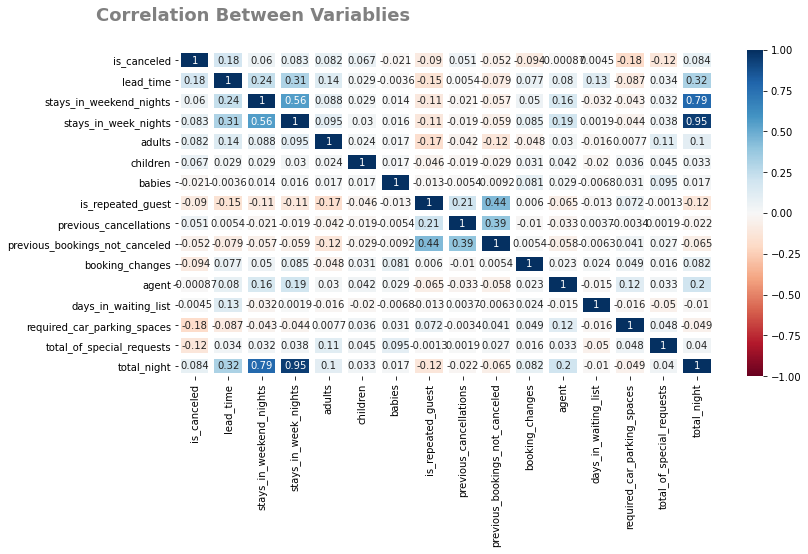

In [71]:
plt.rcParams['figure.figsize']=(12,6)
sns.heatmap(df.corr(), annot= True , cmap='RdBu',
            vmin=-1,vmax=1, linewidth=5)
plt.suptitle('Correlation Between Variablies', fontweight = 'heavy',
             x=0.03 , y=0.98, ha = 'left', fontsize='18',
            fontfamily='sans-serif', color='gray')

## Exploratory Data Analysis EDA
Understand context: 
- Define right question to start process
    - We can look at correlation heatmap & formulate the question base on the relationships between attributes.
    - We can look at the statistics in descriptive analysis
    - We can make random visualizations then formulate the question.
    - We can choose objects and build questions around it as
        - Booking:
        1. What is the big picture of room booking over year and month 
        2. What are the most effective booking channels?
        3. Are the guesses interested in booking meals along with their room reservation?
        - Hotel:
        4. What are the most popular hotels and how many booking they have over the year?
        5. Compare those hotel on type of customers?
        6. Compare those hotels on customers’ group?
        - Customers:
        7. What is trend of customer requests during their stay in different room types
        8. What market segment has highest repeated guest rate and highest stay duration ?
         9.Is the number of customer in baby group affect their parents’ decision in booking meals and stay duration?
        10. What types of room are most popular for children and babies?
       
- define constrains for our questions as 
    - project goals 
    - business objectives 
    - company values 
    - client expectations.

In [73]:
# After data preparation process, we can export the file to csv, 
#then import to Tableau for visualization later
df.to_csv('hotel_bookings_clean.csv',index= False)